In [1]:
import scanpy as sc
import numpy as np
import pandas as pd
import anndata as ad 

In [2]:
input_dir = "D:/bio/splatter/data/file/origin/"

In [14]:
meta = pd.read_csv(input_dir + 'meta_2batch_6celltype.csv', index_col=5)
metrix = pd.read_csv(input_dir + 'matrix_2batch_6celltype.csv', index_col=0)

In [15]:
metrix

,Cell5,Cell14,Cell16,Cell28,Cell39,Cell60,Cell61,Cell72,Cell81,Cell86,...,Cell798,Cell814,Cell818,Cell826,Cell832,Cell836,Cell837,Cell849,Cell850,Cell859
Gene1,8.371484,7.999101,8.050146,7.982072,7.999918,8.476086,7.967318,8.257279,8.385113,8.366965,...,8.495883,8.970170,8.061225,8.747759,8.487382,8.419244,7.752183,8.395182,7.954049,8.531478
Gene2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Gene3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Gene4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.643721,0.000000,0.000000,0.000000
Gene5,4.753757,5.302556,5.046146,4.705279,4.207803,5.186481,5.106485,5.630736,5.443100,5.474169,...,3.301838,2.781774,3.746829,3.859457,3.299953,2.885287,4.081962,4.074054,3.728407,5.018969
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Gene496,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Gene497,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Gene498,5.144011,5.875282,5.725934,5.441468,5.624214,5.782808,5.780144,5.666534,6.016966,5.286153,...,5.353242,6.292417,5.693058,5.063314,5.105549,5.330695,4.607140,5.868635,4.824610,5.716080
Gene499,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [16]:
adata=ad.AnnData( metrix.T )
adata.obs = meta
adata.obsm['spatial'] = adata.obs[['x', 'y']].values
adata

AnnData object with n_obs × n_vars = 648 × 500
    obs: 'Unnamed: 0', 'x', 'y', 'celltype', 'batch'
    obsm: 'spatial'

In [17]:
groups = adata.obs.groupby("batch").indices
adata_list = [adata[i] for i in groups.values()]
adata_list

[View of AnnData object with n_obs × n_vars = 324 × 500
     obs: 'Unnamed: 0', 'x', 'y', 'celltype', 'batch'
     obsm: 'spatial',
 View of AnnData object with n_obs × n_vars = 324 × 500
     obs: 'Unnamed: 0', 'x', 'y', 'celltype', 'batch'
     obsm: 'spatial']

In [18]:
import scipy.sparse
adata_list[0].X = scipy.sparse.csr_matrix(adata_list[0].X)
adata_list[0].X

ValueError: setting an array element with a sequence.

In [6]:
adata.write_h5ad(input_dir + '2batch_6celltype.h5ad')

In [75]:
sc.pp.neighbors(adata)
sc.tl.umap(adata)
sc.tl.tsne(adata)

         Falling back to preprocessing with `sc.pp.pca` and default params.


D:\anaconda\envs\index\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
D:\anaconda\envs\index\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


[<Axes: title={'center': 'batch'}, xlabel='UMAP1', ylabel='UMAP2'>,
 <Axes: title={'center': 'celltype'}, xlabel='UMAP1', ylabel='UMAP2'>]

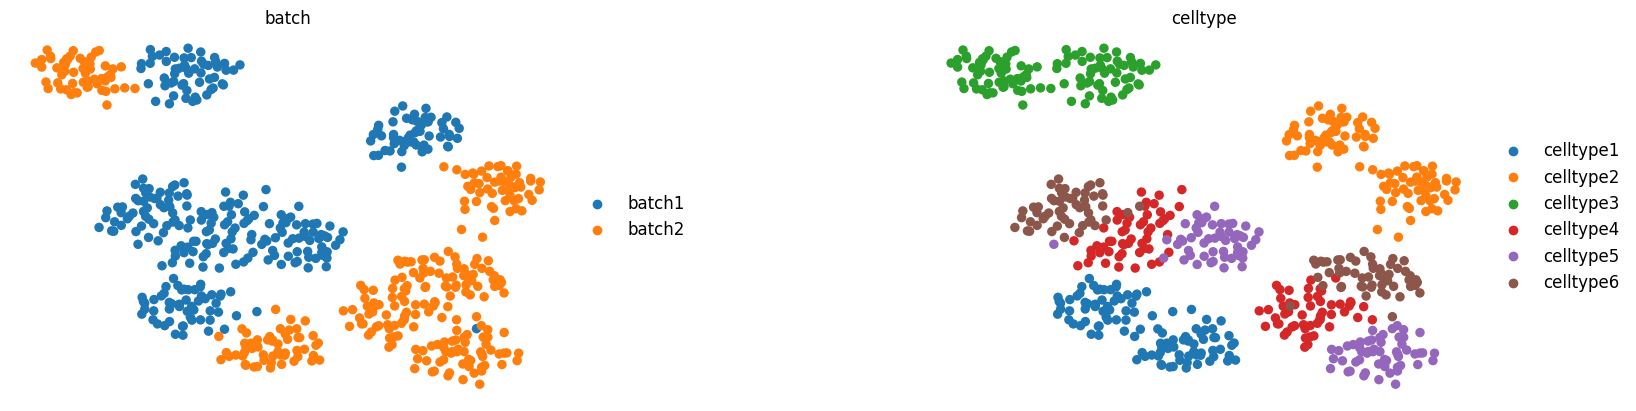

In [76]:
sc.pl.umap(adata, color=['batch', 'celltype'], ncols=2, wspace=0.5, 
           show=False, legend_fontsize=12, legend_fontoutline=2, frameon=False)

[<Axes: title={'center': 'batch'}, xlabel='spatial1', ylabel='spatial2'>,
 <Axes: title={'center': 'celltype'}, xlabel='spatial1', ylabel='spatial2'>]

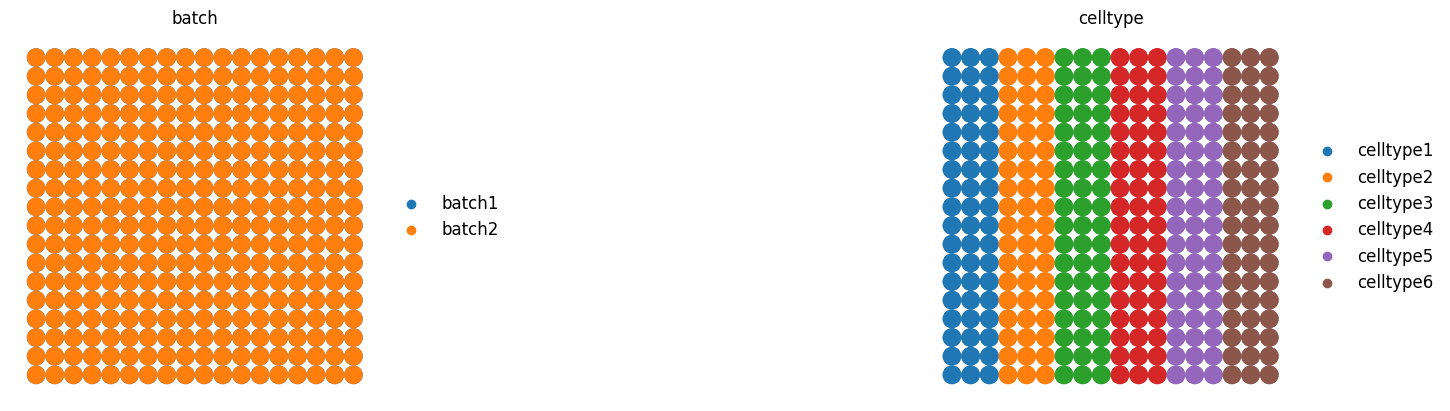

In [66]:
sc.pl.spatial(adata, color=['batch', 'celltype'], ncols=2, wspace=0.5, spot_size = 1,
           show=False, legend_fontsize=12, legend_fontoutline=2, frameon=False)